In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_1894/872873523.py:36: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  "First_Close_Next_Month": float(first_next_month_close) if first_next_month_close is not None else None,
/tmp/ipykernel_1894/872873523.py:35: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  "Last_Close_Prev_Month": float(last_prev_month_close) if last_prev_month_close is not None else None,


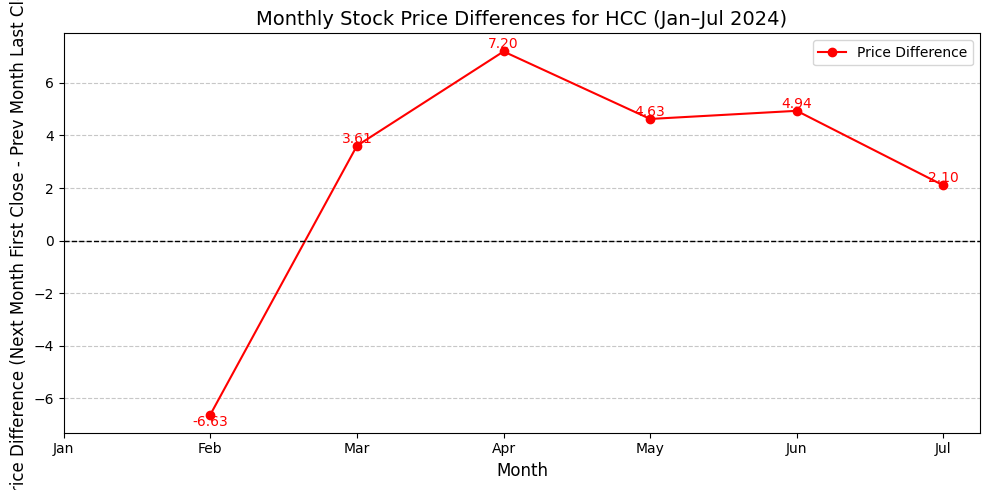

In [13]:
# Define the stock symbol and the year
symbol = "HCC"  # Replace with the desired stock ticker
year = 2024

# Fetch historical data from December 2023 to August 2024
start_date = "2023-12-01"
end_date = "2024-08-31"
stock_data = yf.download(symbol, start=start_date, end=end_date)

# Drop rows with any missing values (if there are any)
stock_data.dropna(inplace=True)

# Ensure the Date column is a proper datetime format
stock_data.reset_index(inplace=True)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Filter the required closing prices
result = []
for month in range(1, 8):  # Months from January to July
    # Get the last trading day of the previous month
    prev_month_data = stock_data[(stock_data['Date'].dt.month == month - 1) & (stock_data['Date'].dt.year == (year if month > 1 else year - 1))]
    last_prev_month_close = prev_month_data.iloc[-1]['Close'] if not prev_month_data.empty else None

    # Get the first trading day of the following month
    next_month_data = stock_data[(stock_data['Date'].dt.month == month + 1) & (stock_data['Date'].dt.year == (year if month < 12 else year + 1))]
    first_next_month_close = next_month_data.iloc[0]['Close'] if not next_month_data.empty else None

    # Append clean results
    result.append({
        "Month": month,
        "Last_Close_Prev_Month": float(last_prev_month_close) if last_prev_month_close is not None else None,
        "First_Close_Next_Month": float(first_next_month_close) if first_next_month_close is not None else None,
    })

# Convert results to a DataFrame
result_df = pd.DataFrame(result)

# Calculate the difference
result_df['Difference'] = result_df['First_Close_Next_Month'] - result_df['Last_Close_Prev_Month']

# Filter for months 1–7
filtered_df = result_df[result_df["Month"].isin(range(1, 8))]

# Plot the data
plt.figure(figsize=(10, 5))

# Line plot to highlight differences
plt.plot(filtered_df["Month"], filtered_df["Difference"], marker="o", linestyle="-", color="red", label="Price Difference")

# Add horizontal line at zero to show positive/negative differences
plt.axhline(0, color="black", linestyle="--", linewidth=1)

# Add labels for each point
for i, row in filtered_df.iterrows():
    plt.text(
        row["Month"], row["Difference"], f"{row['Difference']:.2f}", fontsize=10,
        ha="center", va="bottom" if row["Difference"] >= 0 else "top", color="red"
    )

# Labels and title
plt.title(f"Monthly Stock Price Differences for {symbol} (Jan–Jul {year})", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Price Difference (Next Month First Close - Prev Month Last Close)", fontsize=12)
plt.xticks(filtered_df["Month"], ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul"], fontsize=10)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


In [4]:
import pandas as pd
df = pd.read_csv('BCC_monthly_closing_prices_2024.csv')
df

,Month,Last_Close_Prev_Month,First_Close_Next_Month
0,1,NaN,138.910004
1,2,135.460007,137.789993
2,3,135.910004,152.949997
3,4,153.369995,132.009995
4,5,132.270004,134.649994
5,6,137.289993,117.690002
6,7,119.220001,133.600006
7,8,142.089996,124.809998
8,9,135.619995,141.389999
9,10,140.979996,134.210007


[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_1894/744712497.py:41: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  "First_Close_Next_Month": float(first_next_month_close) if first_next_month_close is not None else None,
/tmp/ipykernel_1894/744712497.py:40: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  "Last_Close_Prev_Month": float(last_prev_month_close) if last_prev_month_close is not None else None,


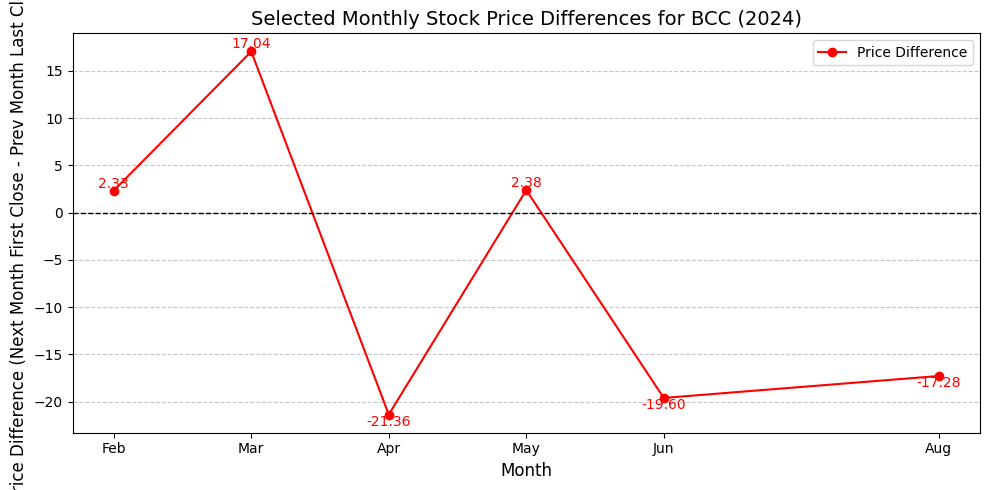

In [9]:
# Define the stock symbol and the year
symbol = "BCC"  # Replace with the desired stock ticker
year = 2024

# Fetch historical data for the year 2024
start_date = f"{year}-01-01"
end_date = f"{year}-12-31"
stock_data = yf.download(symbol, start=start_date, end=end_date)

# Drop rows with any missing values (if there are any)
stock_data.dropna(inplace=True)

# Ensure the Date column is a proper datetime format
stock_data.reset_index(inplace=True)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Filter the required closing prices
result = []
for month in range(1, 13):
    # Filter for the current month's data
    month_data = stock_data[(stock_data['Date'].dt.month == month) & (stock_data['Date'].dt.year == year)]
    
    # Get the last trading day of the previous month
    prev_month_data = stock_data[(stock_data['Date'].dt.month == month - 1) & (stock_data['Date'].dt.year == year)]
    if not prev_month_data.empty:
        last_prev_month_close = prev_month_data.iloc[-1]['Close']
    else:
        last_prev_month_close = None
    
    # Get the first trading day of the following month
    next_month_data = stock_data[(stock_data['Date'].dt.month == month + 1) & (stock_data['Date'].dt.year == year)]
    if not next_month_data.empty:
        first_next_month_close = next_month_data.iloc[0]['Close']
    else:
        first_next_month_close = None

    # Append clean results
    result.append({
        "Month": month,
        "Last_Close_Prev_Month": float(last_prev_month_close) if last_prev_month_close is not None else None,
        "First_Close_Next_Month": float(first_next_month_close) if first_next_month_close is not None else None,
    })

# Convert results to a DataFrame
result_df = pd.DataFrame(result)

# Calculate the difference
result_df['Difference'] = result_df['First_Close_Next_Month'] - result_df['Last_Close_Prev_Month']

# Filter for specific months (February, March, April, May, June, and August)
selected_months = [2, 3, 4, 5, 6, 8]
filtered_df = result_df[result_df["Month"].isin(selected_months)]

# Plot the data
plt.figure(figsize=(10, 5))

# Line plot to highlight differences
plt.plot(filtered_df["Month"], filtered_df["Difference"], marker="o", linestyle="-", color="red", label="Price Difference")

# Add horizontal line at zero to show positive/negative differences
plt.axhline(0, color="black", linestyle="--", linewidth=1)

# Add labels for each point
for i, row in filtered_df.iterrows():
    plt.text(
        row["Month"], row["Difference"], f"{row['Difference']:.2f}", fontsize=10,
        ha="center", va="bottom" if row["Difference"] >= 0 else "top", color="red"
    )

# Labels and title
plt.title(f"Selected Monthly Stock Price Differences for {symbol} ({year})", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Price Difference (Next Month First Close - Prev Month Last Close)", fontsize=12)
plt.xticks(filtered_df["Month"], ["Feb", "Mar", "Apr", "May", "Jun", "Aug"], fontsize=10)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()
